In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Dense

print(tf.__version__)

2.15.0


In [ ]:
import random
random.seed(5555)

In [ ]:
raw_dataset = pd.read_csv('./diamonds.csv',
                          na_values='?', comment='\t',
                          sep=',', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
49999,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
import statistics
statistics.mean(dataset['price'])

3944.80544

In [ ]:
dataset.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
# list of categorical columns
categorical_cols = ['cut', 'color', 'clarity']

# one-hot-encoding
data_encoded = pd.get_dummies(dataset, columns=categorical_cols, drop_first=False, dtype=int)

In [ ]:
q_low = data_encoded["price"].quantile(0.01)
q_hi  = data_encoded["price"].quantile(0.99)

data_encoded = data_encoded[(data_encoded["price"] < q_hi) & (data_encoded["price"] > q_low)]

q_low = data_encoded["x"].quantile(0.01)
q_hi  = data_encoded["x"].quantile(0.99)

data_encoded = data_encoded[(data_encoded["x"] < q_hi) & (data_encoded["x"] > q_low)]

q_low = data_encoded["y"].quantile(0.01)
q_hi  = data_encoded["y"].quantile(0.99)

data_encoded = data_encoded[(data_encoded["y"] < q_hi) & (data_encoded["y"] > q_low)]

q_low = data_encoded["z"].quantile(0.01)
q_hi  = data_encoded["z"].quantile(0.99)

data_encoded = data_encoded[(data_encoded["z"] < q_hi) & (data_encoded["z"] > q_low)]

q_low = data_encoded["carat"].quantile(0.01)
q_hi  = data_encoded["carat"].quantile(0.99)

data_encoded = data_encoded[(data_encoded["carat"] < q_hi) & (data_encoded["carat"] > q_low)]

q_low = data_encoded["depth"].quantile(0.01)
q_hi  = data_encoded["depth"].quantile(0.99)

data_encoded = data_encoded[(data_encoded["depth"] < q_hi) & (data_encoded["depth"] > q_low)]

q_low = data_encoded["table"].quantile(0.01)
q_hi  = data_encoded["table"].quantile(0.99)

data_encoded = data_encoded[(data_encoded["table"] < q_hi) & (data_encoded["table"] > q_low)]

In [ ]:
data_encoded

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
57,0.35,60.9,57.0,552,4.54,4.59,2.78,0,0,1,...,1,0,0,0,0,0,1,0,0,0
60,0.42,61.5,59.0,552,4.78,4.84,2.96,0,0,0,...,1,0,0,0,0,1,0,0,0,0
61,0.32,62.0,55.3,553,4.39,4.42,2.73,0,0,1,...,1,0,0,0,0,0,0,0,1,0
62,0.31,63.3,57.0,553,4.33,4.30,2.73,0,0,0,...,0,0,0,0,1,0,0,0,0,0
63,0.31,61.8,58.0,553,4.35,4.32,2.68,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
49996,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
49997,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
49998,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
train_dataset = data_encoded.sample(frac=0.8, random_state=1)
test_dataset = data_encoded.drop(train_dataset.index)

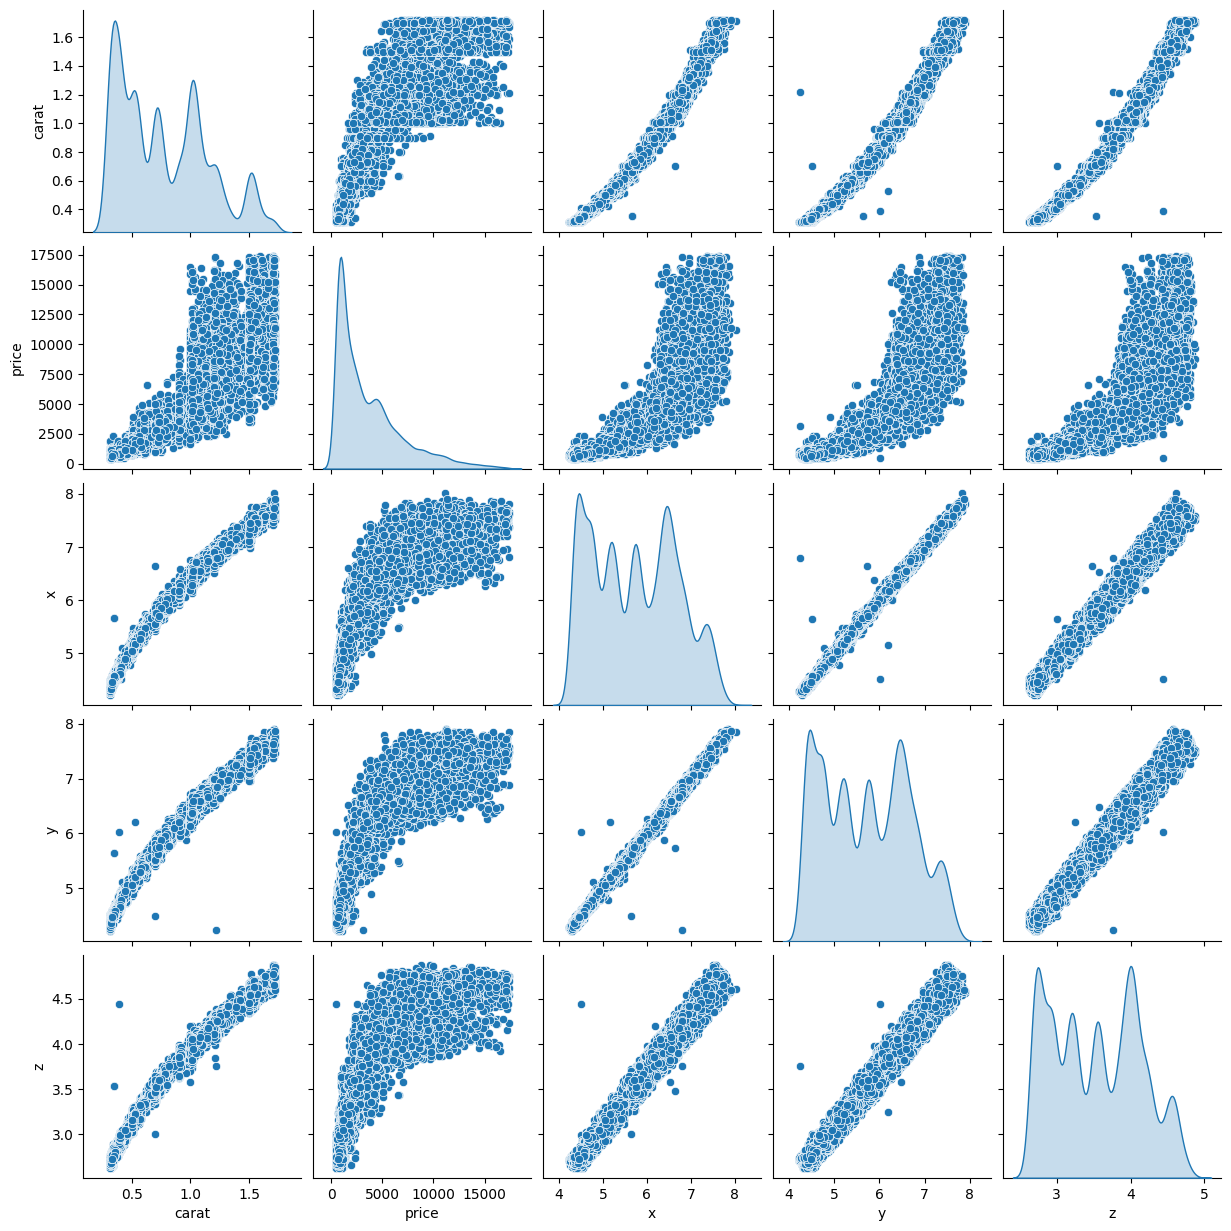

In [242]:
sns.pairplot(train_dataset[['carat', 'price',	'x',	'y',	'z']], diag_kind='kde')

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,32972.0,0.773121,0.376182,0.31,0.42,0.71,1.03,1.72
depth,32972.0,61.757130,1.212474,58.00,61.10,61.80,62.50,65.40
table,32972.0,57.317008,1.920602,53.10,56.00,57.00,59.00,62.60
price,32972.0,3671.127350,3260.516817,431.00,1069.75,2544.00,5161.50,17366.00
x,32972.0,5.730671,0.952721,4.22,4.81,5.72,6.50,8.02
y,32972.0,5.734302,0.947514,4.22,4.81,5.74,6.50,7.90
z,32972.0,3.539997,0.588773,2.63,2.97,3.54,4.02,4.87
cut_Fair,32972.0,0.014679,0.120267,0.00,0.00,0.00,0.00,1.00
cut_Good,32972.0,0.079461,0.270462,0.00,0.00,0.00,0.00,1.00
cut_Ideal,32972.0,0.418658,0.493347,0.00,0.00,0.00,1.00,1.00


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
carat,0.773121,0.376182
depth,61.757130,1.212474
table,57.317008,1.920602
price,3671.127350,3260.516817
x,5.730671,0.952721
y,5.734302,0.947514
z,3.539997,0.588773
cut_Fair,0.014679,0.120267
cut_Good,0.079461,0.270462
cut_Ideal,0.418658,0.493347


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32972 entries, 10268 to 26285
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          32972 non-null  float64
 1   depth          32972 non-null  float64
 2   table          32972 non-null  float64
 3   x              32972 non-null  float64
 4   y              32972 non-null  float64
 5   z              32972 non-null  float64
 6   cut_Fair       32972 non-null  int64  
 7   cut_Good       32972 non-null  int64  
 8   cut_Ideal      32972 non-null  int64  
 9   cut_Premium    32972 non-null  int64  
 10  cut_Very Good  32972 non-null  int64  
 11  color_D        32972 non-null  int64  
 12  color_E        32972 non-null  int64  
 13  color_F        32972 non-null  int64  
 14  color_G        32972 non-null  int64  
 15  color_H        32972 non-null  int64  
 16  color_I        32972 non-null  int64  
 17  color_J        32972 non-null  int64  
 18  clarity

In [ ]:
print(normalizer.mean.numpy())

[[ 0.773 61.757 57.317  5.731  5.734  3.54   0.015  0.079  0.419  0.269
   0.218  0.126  0.184  0.182  0.218  0.149  0.093  0.047  0.011  0.032
   0.251  0.163  0.154  0.238  0.063  0.089]]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 1.   63.4  61.    6.35  6.29  4.01  0.    0.    0.    0.    1.    0.
   0.    1.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.
   0.    0.  ]]

Normalized: [[ 0.6   1.36  1.92  0.65  0.59  0.8  -0.12 -0.29 -0.85 -0.61  1.9  -0.38
  -0.47  2.12 -0.53 -0.42 -0.32 -0.22 -0.11 -0.18  1.73 -0.44 -0.43 -0.56
  -0.26 -0.31]]


In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(10, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))
  return model

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 26)                53        
 on)                                                             
                                                                 
 module_wrapper_106 (Module  (None, 10)                270       
 Wrapper)                                                        
                                                                 
 module_wrapper_107 (Module  (None, 1)                 11        
 Wrapper)                                                        
                                                                 
Total params: 334 (1.31 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 53 (216.00 Byte)
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 2min 59s, sys: 9.05 s, total: 3min 8s
Wall time: 2min 43s


In [240]:
print('Training Loss:')
print(history.history['loss'][-1])
print('Validation Loss:')
print(history.history['val_loss'][-1])

Traing Loss:
267.5293884277344
Validation Loss:
275.64312744140625


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [price]')
  plt.legend()
  plt.grid(True)

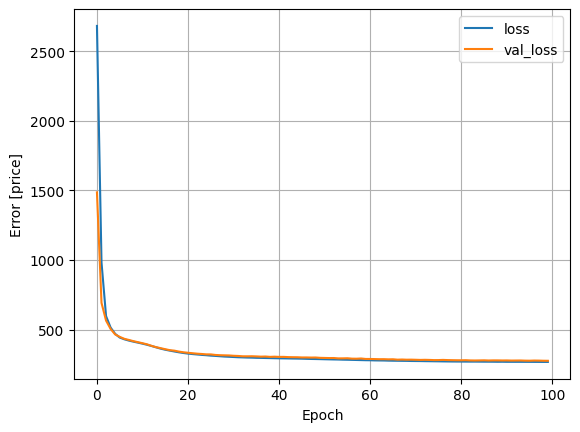

In [ ]:
plot_loss(history)

258/258 [==============================] - 1s 2ms/step


Text(0, 0.5, 'Predictions [price]')

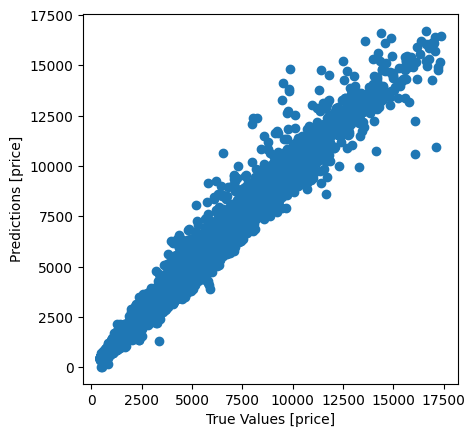

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')


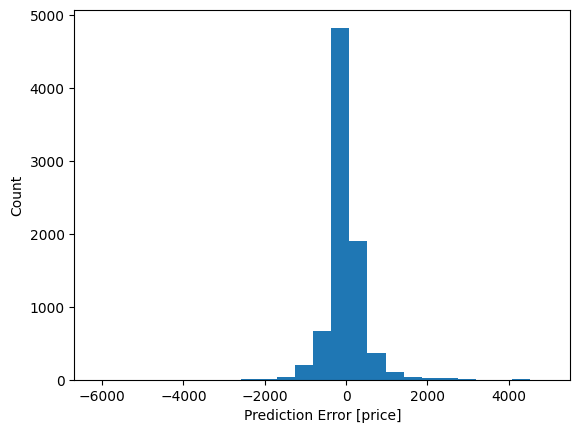

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [price]')
_ = plt.ylabel('Count')

In [ ]:
from sklearn.metrics import r2_score
coefficient_of_dermination = r2_score(test_labels, test_predictions)
coefficient_of_dermination

In [ ]:
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_labels, test_predictions)
rmse = math.sqrt(mse)
rmse

465.922101045292

In [ ]:
import math
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels, test_predictions)
mae

262.85826432055586

In [ ]:
test_control = test_features.copy()
test_control = test_control.reset_index(drop=True)
test_control['test_predictions'] = pd.DataFrame(test_predictions, columns=['predicitons']).reset_index(drop=True)
test_control['test_labels'] = test_labels.reset_index(drop=True)
test_control['error'] = test_control['test_labels'] - test_control['test_predictions']
test_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8243 entries, 0 to 8242
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   carat             8243 non-null   float64
 1   depth             8243 non-null   float64
 2   table             8243 non-null   float64
 3   x                 8243 non-null   float64
 4   y                 8243 non-null   float64
 5   z                 8243 non-null   float64
 6   cut_Fair          8243 non-null   int64  
 7   cut_Good          8243 non-null   int64  
 8   cut_Ideal         8243 non-null   int64  
 9   cut_Premium       8243 non-null   int64  
 10  cut_Very Good     8243 non-null   int64  
 11  color_D           8243 non-null   int64  
 12  color_E           8243 non-null   int64  
 13  color_F           8243 non-null   int64  
 14  color_G           8243 non-null   int64  
 15  color_H           8243 non-null   int64  
 16  color_I           8243 non-null   int64  


In [ ]:
test_control.to_csv('file_diamond.csv')

In [243]:
#linear model

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_features, train_labels)

LinearPredictions = regr.predict(test_features)

In [244]:
LinearPredictions

array([2187.109, 3123.707, 3355.678, ..., 3344.46 , 2345.672, 2582.25 ])

Text(0, 0.5, 'Predictions [price]')

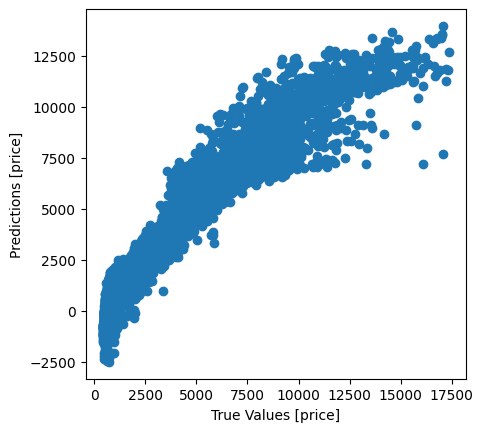

In [245]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, LinearPredictions)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')

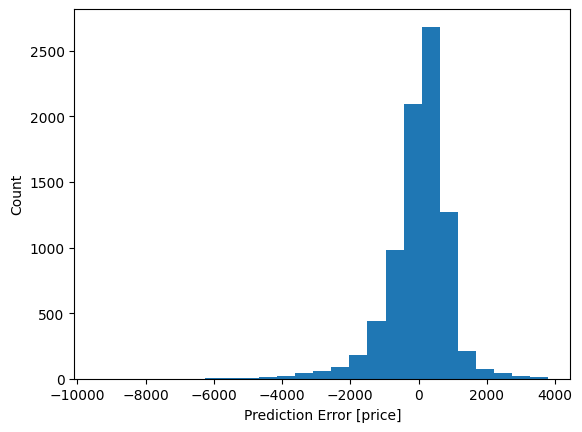

In [246]:
error = LinearPredictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [price]')
_ = plt.ylabel('Count')

In [248]:
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_labels, LinearPredictions)
rmse = math.sqrt(mse)
rmse

906.5867340301093

In [249]:
print(regr.coef_)

[14525.849   231.783   -36.276  -882.788  2275.028 -5920.179  -354.223
   -47.209   192.064   138.313    71.055   877.349   665.312   566.062
   334.324  -210.601  -757.436 -1475.01  -2875.182  1433.471  -337.475
 -1231.656   585.677   266.915  1114.696  1043.554]
